In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

ROOT_DIR = Path().resolve(strict=True).parent
DOMAIN = "https://inversionesyfinanzas.xyz"
DATA_DIR = f"{ROOT_DIR}/data/"
df = pd.read_parquet(f"{DATA_DIR}/interim/country_codes.parquet")

We have 6 majors columns:
    date: str
        the date that the user requested the url

    current_path: str
        the url that the user requested

    ip: str
        the ip of the user

    http_user_agent: str
        the http user agent of the user that made the request

    is_bot: bool 
        is user a bot
    
    user_id: int 
        the id of the user
        
    country_code: str
        list of countries accronyms [AE to ZA] and unknown

What we could want to know?
- Number total of requests per user
- Most requested url
- Proportion of bots/users
- Average requests per minute
- Most number of bots per country

In [2]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 10 else ''

<AxesSubplot: >

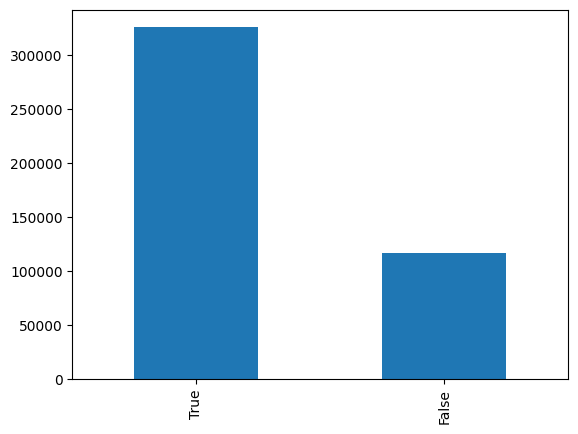

In [3]:
df["is_bot"].value_counts().plot(kind="bar")

<AxesSubplot: title={'center': 'Users as bots'}, ylabel='is_bot'>

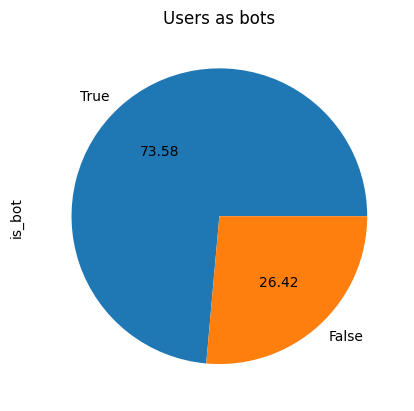

In [4]:
df["is_bot"].value_counts().plot(kind="pie", title="Users as bots", autopct=autopct)
# plt.show() hides the plot objet

<AxesSubplot: title={'center': 'Bots per country all'}>

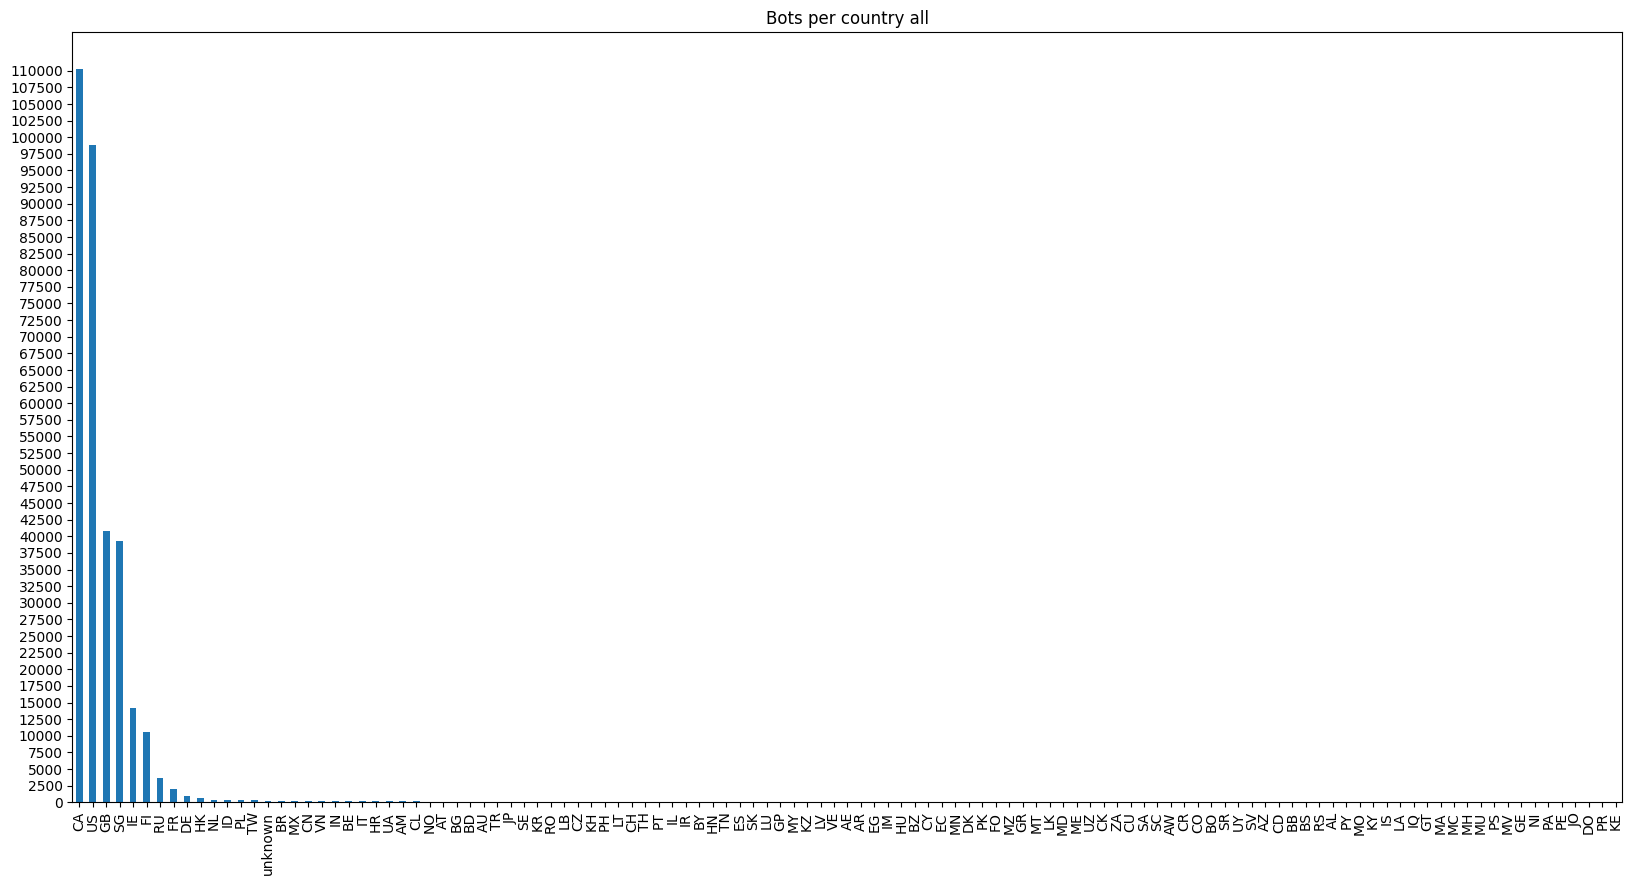

In [5]:
bots = df[df["is_bot"]==True]

max_value = bots["country_code"].value_counts().max()
bots["country_code"].value_counts().plot(kind="bar", title="Bots per country all", figsize=(20,10), yticks=range(0, max_value, 2500))

<AxesSubplot: title={'center': 'Bots per country bigger ones'}>

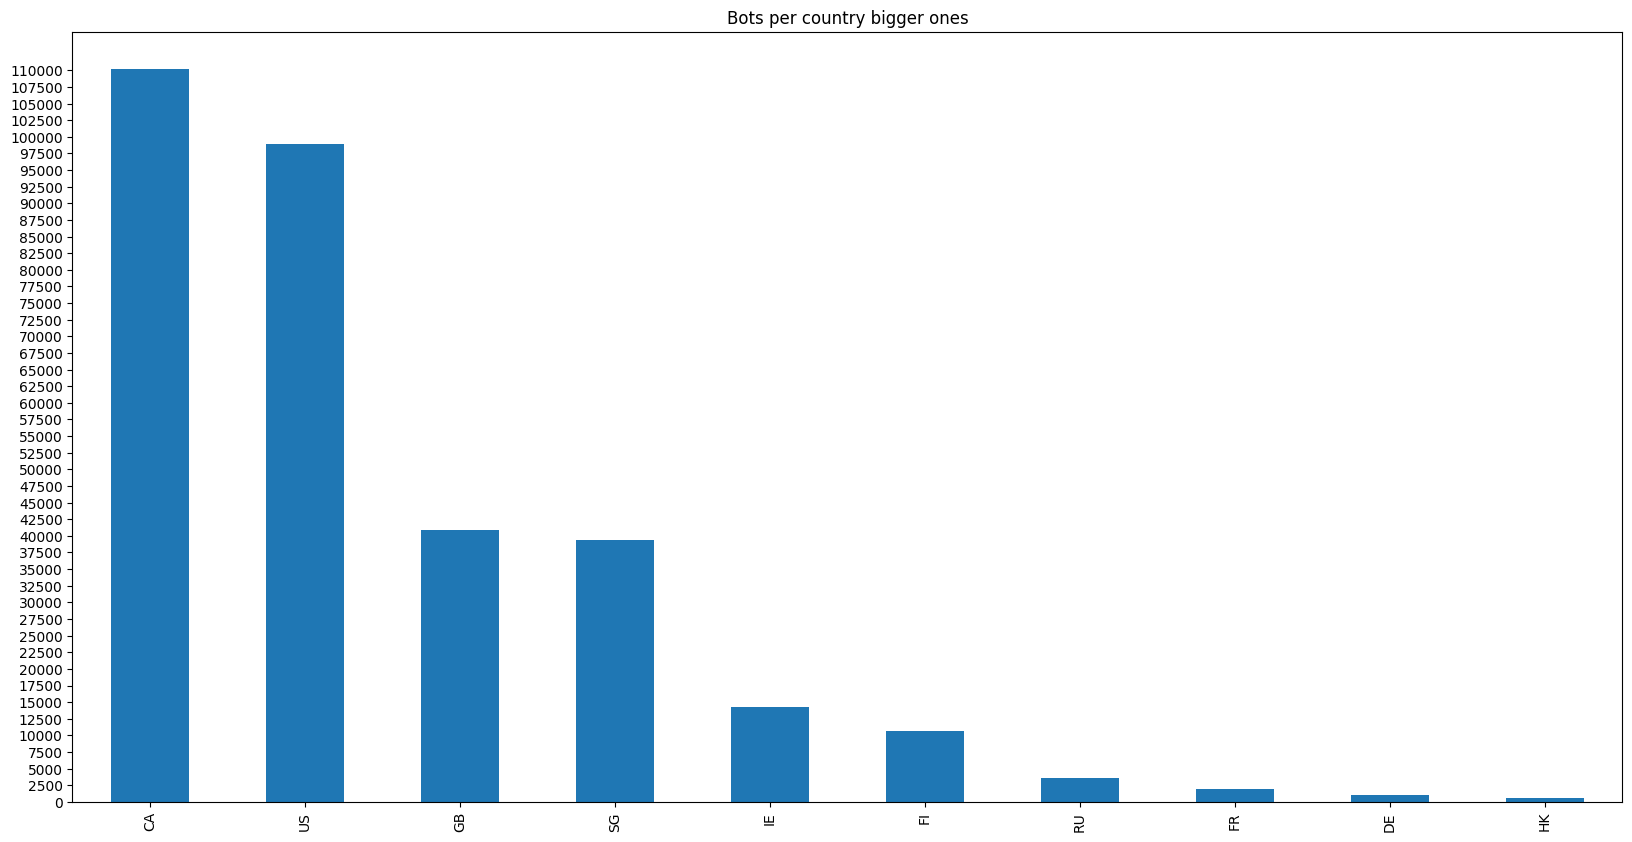

In [6]:
bots = df[df["is_bot"]==True]
bigger_countries_bots = bots["country_code"].value_counts().head(10)
max_value = bigger_countries_bots.max()
bigger_countries_bots.plot(kind="bar", figsize=(20,10), title="Bots per country bigger ones", yticks=range(0, max_value, 2500))

<AxesSubplot: title={'center': 'Bots per country, smaller ones'}>

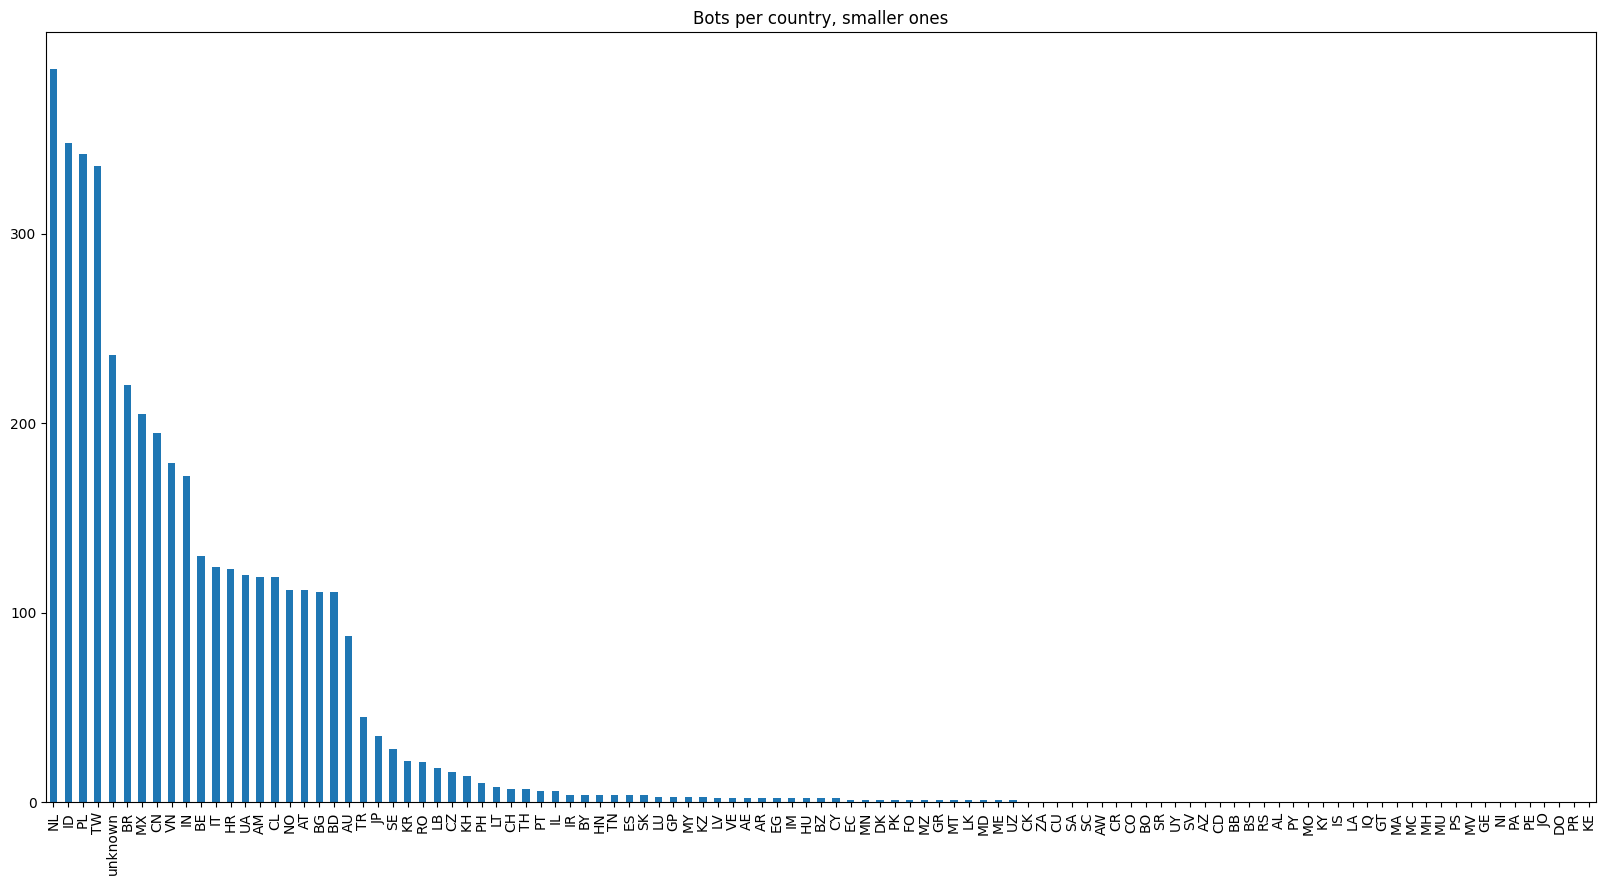

In [7]:
smaller_countries_bots = bots["country_code"].value_counts()[10:]
max_value = smaller_countries_bots.max()
smaller_countries_bots.plot(kind="bar", figsize=(20,10), title="Bots per country, smaller ones", yticks=range(0, max_value, 100),)

In [9]:
users = df[df["is_bot"]==False]

In [14]:
users["user_id"].value_counts().head(10)

964      16188
3371     15461
630      13872
14553    11446
11873     4729
18078     1176
17666      814
6835       544
3464       497
12176      488
Name: user_id, dtype: int64

<AxesSubplot: title={'center': 'Request per users'}>

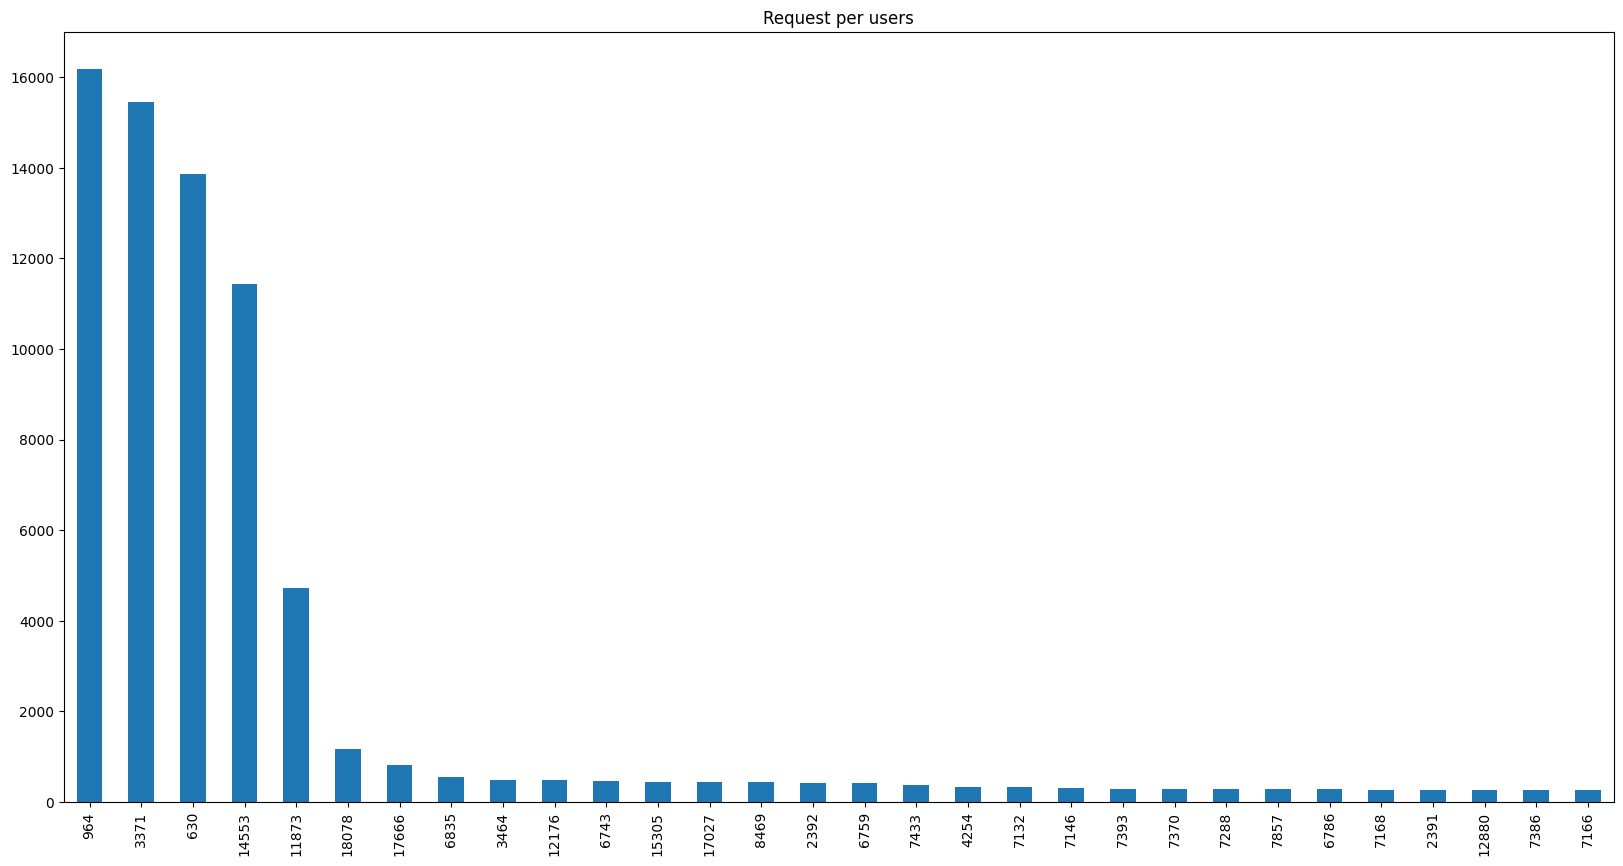

In [20]:
max_value = users["user_id"].value_counts().head(30).max()
users["user_id"].value_counts().head(30).plot(kind="bar", figsize=(20,10), title="Request per users", )